# Stationary distribution - Absolute value of Brownian motion

In [1]:
# Libraries ----
import sys
import warnings
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import matplotlib.ticker as mtick # type: ignore

from scipy.optimize import curve_fit # type: ignore

sys.path.append('../modules')
import misc_functions as mf # type: ignore
import eda_brownian_motion as edabm # type: ignore
import estimate_brownian_motion as ebm # type: ignore

# Global options ----
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

## Global variables

In [2]:
input_path_raw = "../input_files/raw_data"
input_path_processed = "../input_files/processed_data"
input_path_data_dictionary = "../input_files/data_dictionary"
log_path = "../logs"
output_path = "../output_files"
input_generation_date = "2024-04-22"

## Brownian motion simulations

In [3]:
mu = 0 # Stochastic drift
sigma = 0.2 # Diffusion coefficient
x0 = 0 # Initial value
t0 = 0 # Initial time
tf = 10 # Last time
n_steps = 11 # Number of steps per simulation
n_samples = 20 # Number of simulations

In [4]:
# Brownian motion arguments list sampling ----
bm_args_list = pd.DataFrame(
    {
        "x0" : np.repeat(x0, n_samples),
        "t0" : np.repeat(t0, n_samples),
        "tf" : np.repeat(tf, n_samples),
        "n_steps" : np.repeat(n_steps, n_samples),
        "n_samples" : np.arange(1, n_samples + 1, 1)
    }
)
bm_args_list = bm_args_list.values.tolist()


In [5]:
# Simulate multiple Brownian motion paths
df_bm = ebm.simulate_brownian_motion(
    mu = mu,
    sigma = sigma,
    threshold = 0,
    threshold_flag = False,
    bm_args_list = bm_args_list,
    log_path = log_path,
    log_filename = "log_bm",
    verbose = 1,
    tqdm_bar = True
)
df_bm

100%|███████████████████████| 20/20 [00:02<00:00,  9.75it/s]


,simulation,restricted,time,value
0,1,False,0.0,0.000000
1,1,False,1.0,-0.076578
2,1,False,2.0,-0.118538
3,1,False,3.0,-0.080524
4,1,False,4.0,0.181164
...,...,...,...,...
6,20,False,6.0,0.260861
7,20,False,7.0,0.064481
8,20,False,8.0,0.252584
9,20,False,9.0,0.405750


## Brownian motion with threshold

In [6]:
mu = 1 * 10**-1 # Stochastic drift
sigma = 2 * 10**0 # Diffusion coefficient
threshold = 0 * 10**-1 # Threshold value
x0 = 0 * 10**0 # Initial value
t0 = 0 * 10**0 # Initial time
tf = 5 * 10**1 # Last time
n_steps = 5 * 10 ** 3 + 1 # Number of steps per simulation
n_samples = 4 * 10 ** 4 # Number of simulations

In [7]:
# Brownian motion arguments list sampling ----
abm_args_list = pd.DataFrame(
    {
        "x0" : np.repeat(x0, n_samples),
        "t0" : np.repeat(t0, n_samples),
        "tf" : np.repeat(tf, n_samples),
        "n_steps" : np.repeat(n_steps, n_samples),
        "n_samples" : np.arange(1, n_samples + 1, 1)
    }
)
abm_args_list = abm_args_list.values.tolist()


In [8]:
# Simulate multiple of restricted Brownian motion paths
df_abm = ebm.simulate_brownian_motion(
    mu = mu,
    sigma = sigma,
    threshold = threshold,
    threshold_flag = True,
    bm_args_list = abm_args_list,
    log_path = log_path,
    log_filename = "log_abm",
    verbose = 1,
    tqdm_bar = True
)
df_abm

100%|███████████████| 40000/40000 [00:37<00:00, 1065.08it/s]


,simulation,restricted,time,value
0,1,True,0.00,0.000000
1,1,True,0.01,0.087105
2,1,True,0.02,0.358842
3,1,True,0.03,0.642227
4,1,True,0.04,0.542772
...,...,...,...,...
4996,40000,True,49.96,6.231802
4997,40000,True,49.97,6.404814
4998,40000,True,49.98,6.401322
4999,40000,True,49.99,6.452511


# Exploratory Data Analysis

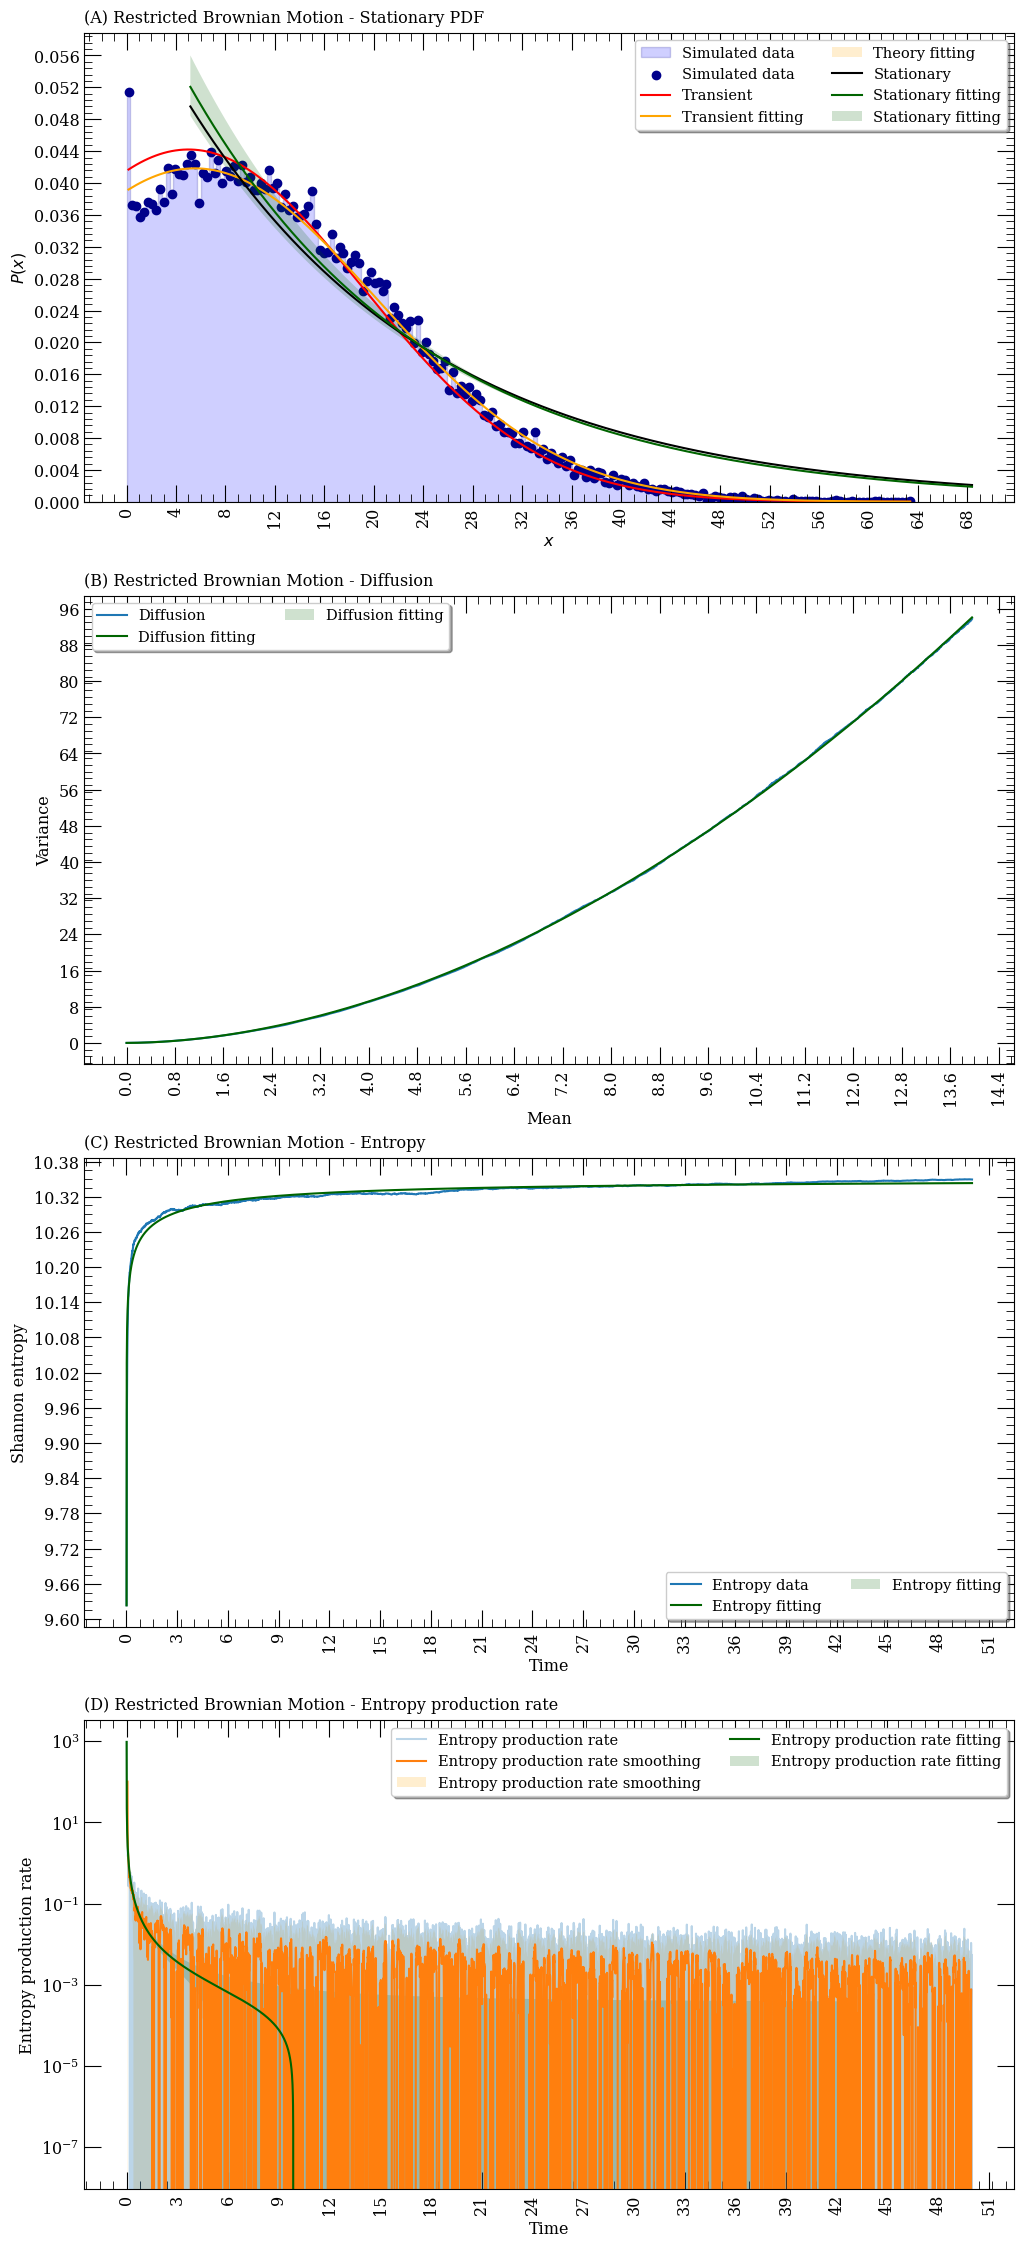

,fitting,params_name,params_value,params_lower,params_upper,r_squared,p_norm,mae_p
0,Transient state,time,5.250000e+01,-2.060205e+07,2.060216e+07,99.131,1,0.000845
1,Transient state,mu,1.050000e-01,-4.120411e+04,4.120432e+04,99.131,1,0.000845
2,Transient state,sigma,2.038719e+00,-4.000162e+05,4.000203e+05,99.131,1,0.000845
3,Transient state,threshold,9.962849e-07,-1.515490e-01,1.515510e-01,99.131,1,0.000845
0,Stationary state,threshold,1.000000e-06,-5.725763e-01,5.725783e-01,86.485,1,0.004905
1,Stationary state,lambda,5.250000e-02,5.024557e-02,5.475442e-02,86.485,1,0.004905
0,Diffusion law,coefficient,6.937998e-01,6.933242e-01,6.942755e-01,99.995,1,0.162548
1,Diffusion law,exponent,1.862446e+00,1.862167e+00,1.862725e+00,99.995,1,0.162548
0,Entropy,mu,-9.406403e-01,-7.652568e+02,7.633756e+02,95.340,1,0.003466
1,Entropy,sigma,1.324297e+00,-1.074696e+03,1.077345e+03,95.340,1,0.003466


In [9]:
edabm.plot_brownian_motion(
    df_bm = df_abm,
    mu = mu,
    sigma = sigma,
    threshold = threshold,
    n_steps = n_steps,
    bins = int(np.sqrt(n_samples))+1,
    density = True,
    alpha = 0.05,
    beta = -6,
    p = 1,
    ma_window = 10,
    p_norm = 1,
    significant_figures = 3,
    width = 12,
    height = 28,
    fontsize_labels = 11.5,
    fontsize_legend = 10.5,
    n_cols = 2,
    n_x_breaks = 20,
    n_y_breaks = 15,
    fancy_legend = True,
    usetex = False,
    dpi = 200,
    save_figures = False,
    output_path = output_path,
    information_name = "absolute_brownian_motion",
    input_generation_date = input_generation_date
)

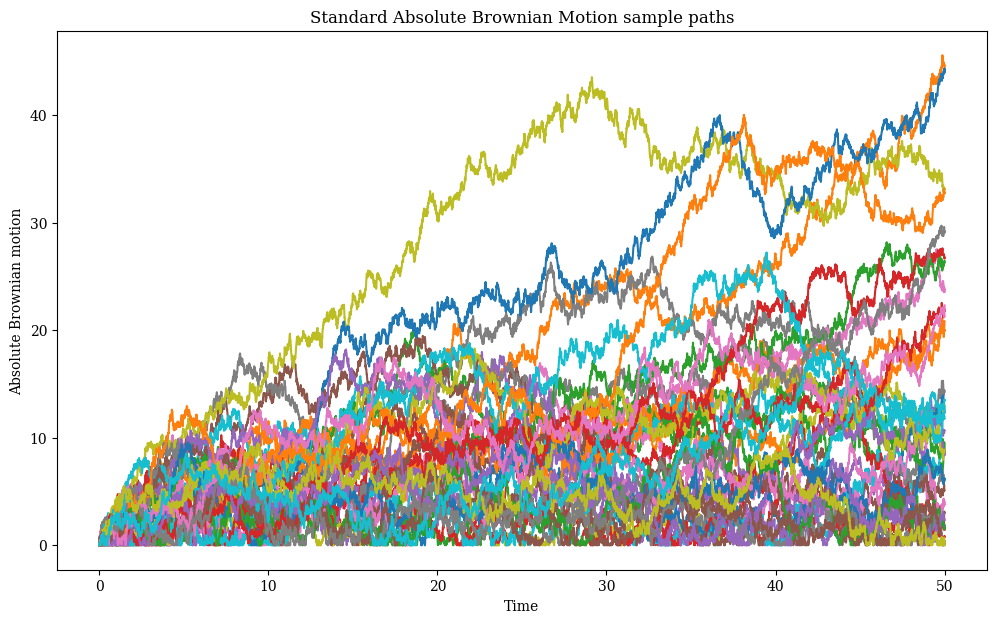

In [10]:
# Absolute Brownian motion samples ----
fig_2, ax_2 = plt.subplots(1, 1, figsize = (12, 7))

for path in range(0, 40):
    df_aux = df_abm[df_abm["simulation"] == path]
    ax_2.plot(
        df_aux["time"],
        df_aux["value"],
        alpha = 1,
        zorder = 2,
        marker = "",
        linestyle = "-",
        markersize = 1
    )
ax_2.set_title("Standard Absolute Brownian Motion sample paths")
ax_2.set_xlabel("Time")
ax_2.set_ylabel("Absolute Brownian motion")
plt.show()